## İleri Toplulaştırma İşlemleri (aggregate, filter, transform, map, applymap, apply)

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['gruplar','degisken1','degisken2'])
df

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
2       C         33        333
3       A         22        262
4       B         11        111
5       C         99        969

Her grup için tek bir değer elde etmek istiyorsanız **aggregate()** (veya kısayollarından birini) kullanın. Orijinal satırların bir alt kümesini almak istiyorsanız **filter()** kullanın. Ve her orijinal satır için yeni bir değer elde etmek istiyorsanız **transpose()** işlevini kullanın.

## aggregate() = agg()

Common Options:

* mean(): Compute mean of groups
* sum(): Compute sum of group values
* size(): Compute group sizes
* count(): Compute count of group
* std(): Standard deviation of groups
* var(): Compute variance of groups
* sem(): Standard error of the mean of groups
* describe(): Generates descriptive statistics
* first(): Compute first of group values
* last(): Compute last of group values
* nth() : Take nth value, or a subset if n is a list
* min(): Compute min of group values
* max(): Compute max of group values

In [2]:
df.agg({"degisken1" : [sum], "degisken2" : [min]})

degisken1  degisken2
sum      198.0        NaN
min        NaN      100.0

In [50]:
df.groupby("gruplar").mean()   #  "gruplar"a göre gruplama işlemi yaptı ve mean ile toplulaştırdı

degisken1  degisken2
gruplar                      
A             16.0      181.0
B             17.0      182.0
C             66.0      651.0

In [3]:
df.groupby("gruplar").aggregate(["min", np.median, max])                     # aggregate ile çoklu çağırma

# eger pandasın içinden fonk alıcaksan ya tırnakla yada tırnaksız yaz ("min", min)
# pandas dışındaki fonk larda "np.median" gibi yer aldığı kütüphane ile yazabiliriz

degisken1            degisken2            
              min median max       min median  max
gruplar                                           
A              10   16.0  22       100  181.0  262
B              11   17.0  23       111  182.0  253
C              33   66.0  99       333  651.0  969

In [55]:
df.groupby("gruplar").agg({"degisken1": "min", "degisken2": "max"})    # sonuçları isimlendirme 

degisken1  degisken2
gruplar                      
A               10        262
B               11        253
C               33        969

## Filter

In [5]:
df

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
2       C         33        333
3       A         22        262
4       B         11        111
5       C         99        969

In [9]:
df.filter(["degisken1","degisken2"])          # df[["degisken1","degisken2"]] aynı sonucu verir

degisken1  degisken2
0         10        100
1         23        253
2         33        333
3         22        262
4         11        111
5         99        969

In [6]:
def filter_func(x):                      # degisken1'e göre standart sapmaları 9 dan büyük olan değerler hesaplandı
    return x["degisken1"].std() > 9     

In [7]:
df.groupby("gruplar").std()              # genel olarak direk standart sapmaların hepsini çıkardı 

degisken1   degisken2
gruplar                       
A         8.485281  114.551299
B         8.485281  100.409163
C        46.669048  449.719913

In [8]:
df.groupby("gruplar").filter(filter_func)     # yani fonksiyon sayesinde (filter_func) belirtilen koşulu yerine getiricek
                                              # bu, pandasın bize sağladığı özelliği fonksiyon sayesinde arttırmadır

gruplar  degisken1  degisken2
2       C         33        333
5       C         99        969

In [58]:
df.groupby("gruplar").filter(lambda x : x["degisken1"].mean() < 30)

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
3       A         22        262
4       B         11        111

## Transform

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['gruplar','degisken1','degisken2'])
df

In [24]:
df                        # transform vektörel çalışan bir fonksiyon yani sütün bazında

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
2       C         33        333
3       A         22        262
4       B         11        111
5       C         99        969

In [25]:
df_a = df.iloc[:,1:3]     # gruplar kısmını almayarak ortalama hesabının yapılabilmesi için ön hazırlık yaptık
df_a                      # çünkü gruplar kısmı harf (stringlerden) oluşuyor

degisken1  degisken2
0         10        100
1         23        253
2         33        333
3         22        262
4         11        111
5         99        969

In [10]:
df_a.transform(lambda x: x-x.mean())   # her bir değişkenden lambda ile kendisinden kendi ortalamasını çıkarması istendi

degisken1  degisken2
0      -23.0     -238.0
1      -10.0      -85.0
2        0.0       -5.0
3      -11.0      -76.0
4      -22.0     -227.0
5       66.0      631.0

In [11]:
df_a.transform(lambda x: (x-x.mean()) / x.std())      # alternatif işlemler 

degisken1  degisken2
0  -0.687871  -0.738461
1  -0.299074  -0.263736
2   0.000000  -0.015514
3  -0.328982  -0.235811
4  -0.657963  -0.704331
5   1.973890   1.957853

In [32]:
df

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
2       C         33        333
3       A         22        262
4       B         11        111
5       C         99        969

In [34]:
df["degisken3"] = df.groupby("gruplar")["degisken1"].transform(sum)    # groupby üzerinden transform
df

gruplar  degisken1  degisken2  degisken3
0       A         10        100         32
1       B         23        253         34
2       C         33        333        132
3       A         22        262         32
4       B         11        111         34
5       C         99        969        132

## Map()

In [38]:
# map seriler üzerinde çalışır apply ise hem seri hem de dataframe üzerinde çalışır 

In [39]:
df = pd.DataFrame({
    "name": ["Kevin", "Jack", "Mary", "Bob", "Robert", "Amy"],
    "score": [66, 75, 80, 93, 77, 81],
    "sex": ["M", "M", "F", "M", "M", "F"],
})
df

name  score sex
0   Kevin     66   M
1    Jack     75   M
2    Mary     80   F
3     Bob     93   M
4  Robert     77   M
5     Amy     81   F

In [40]:
df["say-hello"] = df["sex"].map({"M": "Hello, Mr.", "F": "Hello, Ms."})     # string ifadeler değiştirildi
df

name  score sex   say-hello
0   Kevin     66   M  Hello, Mr.
1    Jack     75   M  Hello, Mr.
2    Mary     80   F  Hello, Ms.
3     Bob     93   M  Hello, Mr.
4  Robert     77   M  Hello, Mr.
5     Amy     81   F  Hello, Ms.

In [41]:
nick_name = pd.Series(['K', 'J', 'M', 'B', 'R', 'A'], index=df["name"])
df["nick-name"] = df["name"].map(nick_name)                               # seri'yi map üzerinden yeni sütun olarak ekledik
df                                                                        # dışarıdan tanımlanmış fonksiyon da alır 

name  score sex   say-hello nick-name
0   Kevin     66   M  Hello, Mr.         K
1    Jack     75   M  Hello, Mr.         J
2    Mary     80   F  Hello, Ms.         M
3     Bob     93   M  Hello, Mr.         B
4  Robert     77   M  Hello, Mr.         R
5     Amy     81   F  Hello, Ms.         A

In [42]:
df["say-hello-msg"] = df["name"].map(lambda x: f"Hello, {x}!")    # lambda ile kullanım, dikkat edilirse hep seri üzerinde çalışıldı
df

name  score sex   say-hello nick-name   say-hello-msg
0   Kevin     66   M  Hello, Mr.         K   Hello, Kevin!
1    Jack     75   M  Hello, Mr.         J    Hello, Jack!
2    Mary     80   F  Hello, Ms.         M    Hello, Mary!
3     Bob     93   M  Hello, Mr.         B     Hello, Bob!
4  Robert     77   M  Hello, Mr.         R  Hello, Robert!
5     Amy     81   F  Hello, Ms.         A     Hello, Amy!

## applymap()

In [43]:
# applymap de map'in tam tersi sadece dataframe üzerinde çalışır 
# apply her ikisinde de çalışabiliyordu 
# applymap'in apply dan en önemli farkı daha performanslı çalışmasıdır

In [46]:
df = pd.DataFrame({
    "name": ["Kevin", "Jack", "Mary", "Bob", "Robert", "Amy"],
    "score": [66, 75, 80, 93, 77, 81],
    "sex": ["m", "m", "f", "m", "m", "f"],
})
df

name  score sex
0   Kevin     66   m
1    Jack     75   m
2    Mary     80   f
3     Bob     93   m
4  Robert     77   m
5     Amy     81   f

In [48]:
df[["name", "sex"]] = df[["name", "sex"]].applymap(lambda x: x.upper())
df

name  score sex
0   KEVIN     66   M
1    JACK     75   M
2    MARY     80   F
3     BOB     93   M
4  ROBERT     77   M
5     AMY     81   F

**DataFrame:**

**apply()** yöntemi, birden fazla sütun veya satır üzerinde karmaşık işlem uygulamak için kullanılır.
Bir sütun veya birden fazla sütun: axis=1 bir satır veya birden fazla satır: axis=0

**applymap()** metodu tüm DataFrame üzerinde eleman bazında işlem yapmak için kullanılır.

**Series:**

**apply()** metodu, Serilerin değerleri üzerinde karmaşık işlemler uygulamak için kullanılır.

**map()** yöntemi, Serinin her bir değerini bazı kurallara veya yazışmalara dayalı olarak başka bir değerle eşlemek için kullanılır.

## apply()

In [26]:
df = pd.DataFrame({
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['degisken1','degisken2'])
df

degisken1  degisken2
0         10        100
1         23        253
2         33        333
3         22        262
4         11        111
5         99        969

In [18]:
# apply fonksiyonu transform ve filter fonksiyonu gibi dataframe'nin değişkenleri üzerinde gezinme yeteneği olan 
# ve toplulaştırma amacıyla kullanılan bir fonksiyondur

In [20]:
df.degisken1.apply(np.sum)       # tek bir sütun üzerinde kullanım

0    10
1    23
2    33
3    22
4    11
5    99
Name: degisken1, dtype: int32

In [76]:
df.apply(np.sum)                  # tüm sütunlarda kullanım

degisken1     198
degisken2    2028
dtype: int64

In [21]:
np.sum(df)                        # vektörize bir işlem üzerinden apply ile aynı sonuç
                                  # numpy içindeki komutlar vektörize bir halde çalışır bu da hız avantajı sağlar

degisken1     198
degisken2    2028
dtype: int64

In [22]:
np.sum(df["degisken1"]) 

198

In [77]:
# apply, transform ve filter fonksiyonları lambda mimarisi ile inanılmaz iş gören fonksiyonlardır

In [78]:
df.apply(np.mean)

degisken1     33.0
degisken2    338.0
dtype: float64

### apply(fonksiyon) & apply(lambda)

In [31]:
def times3(x):
    return x * 3

df.degisken1 = df.degisken1.apply(times3)      # apply'a dışarıdan tanımlanmış bir fonksiyon çağrıldı
df

gruplar  degisken1  degisken2
0       A         30        100
1       B         69        253
2       C         99        333
3       A         66        262
4       B         33        111
5       C        297        969

In [33]:
df.degisken2 = df.degisken2.apply(lambda x : x * 3)    # lambda'nın avantajı hafızada yer tutmuyor ama yukarıda ki def tutuyor
df                                                     # lamda geçici bir fonksiyon ve daha pratik bir kullanıma sahip

gruplar  degisken1  degisken2
0       A         30        900
1       B         69       2277
2       C         99       2997
3       A         66       2358
4       B         33        999
5       C        297       8721

In [34]:
# apply işlemininin sonucu ile yeni bir sütun oluşturalım

In [35]:
df["class_"] = df["gruplar"].apply(lambda x : "First" if x == "A" else ("Second" if x == "B" else "Third"))
df

gruplar  degisken1  degisken2  class_
0       A         30        900   First
1       B         69       2277  Second
2       C         99       2997   Third
3       A         66       2358   First
4       B         33        999  Second
5       C        297       8721   Third

In [36]:
def new_column(x):
    if x == "A":
        return "First"
    elif x == "B":
        return "Second"
    else:
        return "Third"

In [37]:
df["class_"] = df["gruplar"].apply(new_column)
df

gruplar  degisken1  degisken2  class_
0       A         30        900   First
1       B         69       2277  Second
2       C         99       2997   Third
3       A         66       2358   First
4       B         33        999  Second
5       C        297       8721   Third

## apply ve transform farkı

In [12]:
dff = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
dff

A   B
0  1  10
1  2  20
2  3  30

In [13]:
dff.apply(lambda x: x+10)

A   B
0  11  20
1  12  30
2  13  40

In [19]:
dff.transform(lambda x: x+10)       # her bir eleman için işlemi gerçekleştirdi           

A   B
0  11  20
1  12  30
2  13  40

In [20]:
dff.apply(lambda x: x.sum())

A     6
B    60
dtype: int64

In [21]:
df.transform(lambda x: x.sum())      # transform apply gibi toplu sonuçlar üretemez (fark 1)

ValueError: Function did not transform

In [86]:
def subtract_two(x):
    return x['degisken1'] - x['degisken2']

In [87]:
df.apply(subtract_two, axis=1)

0    -90
1   -230
2   -300
3   -240
4   -100
5   -870
dtype: int64

In [85]:
df.transform(subtract_two, axis=1)      # apply() aynı anda birden fazla Seri ile çalışır. Ancak, transform() 
                                        # aynı anda yalnızca tek bir Seri ile çalışmasına izin verilir.  (fark 2)

ValueError: Function did not transform

In [81]:
df.transform([np.sqrt, np.exp])

degisken1                degisken2               
       sqrt           exp       sqrt            exp
0  3.162278  2.202647e+04  10.000000   2.688117e+43
1  4.795832  9.744803e+09  15.905974  7.524955e+109
2  5.744563  2.146436e+14  18.248288  4.169294e+144
3  4.690416  3.584913e+09  16.186414  6.097534e+113
4  3.316625  5.987414e+04  10.535654   1.609487e+48
5  9.949874  9.889030e+42  31.128765            inf

In [82]:
df.apply([np.sqrt, np.exp])                       # ikiside birden fazla numpy işlevini yerine getirdi

degisken1                degisken2               
       sqrt           exp       sqrt            exp
0  3.162278  2.202647e+04  10.000000   2.688117e+43
1  4.795832  9.744803e+09  15.905974  7.524955e+109
2  5.744563  2.146436e+14  18.248288  4.169294e+144
3  4.690416  3.584913e+09  16.186414  6.097534e+113
4  3.316625  5.987414e+04  10.535654   1.609487e+48
5  9.949874  9.889030e+42  31.128765            inf

In [24]:
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['gruplar','degisken1','degisken2'])
df

gruplar  degisken1  degisken2
0       A         10        100
1       B         23        253
2       C         33        333
3       A         22        262
4       B         11        111
5       C         99        969

In [25]:
df.groupby("gruplar").degisken1.apply(np.sum)

gruplar
A     32
B     34
C    132
Name: degisken1, dtype: int64

In [26]:
df.groupby("gruplar").degisken1.transform(np.sum)    # transform seri ile aynı uzunlukta sonuç döndürür 
                                                     # applay ise groupby'a bağlı uzunlukta sonuç döndürdü  (fark 3)

0     32
1     34
2    132
3     32
4     34
5    132
Name: degisken1, dtype: int64

In [29]:
df.groupby("gruplar").apply(lambda x: x['degisken2'] - x['degisken1'])      # apply groupby üzerinde birden fazla seri ile çalışabilir

gruplar   
A        0     90
         3    240
B        1    230
         4    100
C        2    300
         5    870
dtype: int64

In [30]:
df.groupby("gruplar").transform(lambda x: x['degisken2'] - x['degisken1'])   # transform groupby üzerinde birden fazla seri ile çalışamaz

KeyError: 'degisken2'

## Pivot Tablolar

In [29]:
# veri setleri üzerinde bazı satır ve sütün işlemleri yaparak veri setini amaca uygun hale getirmek için kullanılan yapılardır 
# groupby'ın çok boyutlu hali olarak düşünebiliriz

In [4]:
df = pd.DataFrame({"ay":["mart","nisan","mayıs","mart","nisan","mayıs","mart","nisan","mayıs"],
                   "şehir":["ankara","ankara","ankara","istanbul","istanbul","istanbul","izmir","izmir","izmir"],
                   "nem":[10,25,50,21,67,80,30,70,75]})
df

ay     şehir  nem
0   mart    ankara   10
1  nisan    ankara   25
2  mayıs    ankara   50
3   mart  istanbul   21
4  nisan  istanbul   67
5  mayıs  istanbul   80
6   mart     izmir   30
7  nisan     izmir   70
8  mayıs     izmir   75

In [5]:
df.pivot_table(index = "ay", columns = "şehir", values = "nem")    # veri setini daha düzenli hale getirdik pivot ile

şehir  ankara  istanbul  izmir
ay                            
mart       10        21     30
mayıs      50        80     75
nisan      25        67     70

In [6]:
df.pivot_table(index = "şehir", columns = "ay", values = "nem")   # yukarıdakinden farklı bir görünüm

ay        mart  mayıs  nisan
şehir                       
ankara      10     50     25
istanbul    21     80     67
izmir       30     75     70

In [44]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [56]:
titanic.sex.unique()                   # değişkenin eşsiz değerleri

array(['male', 'female'], dtype=object)

In [58]:
titanic.sex.value_counts()             # değişkenin eşsiz değerlerinin toplam sayıları

male      577
female    314
Name: sex, dtype: int64

In [37]:
titanic.groupby("sex")[["survived"]].mean()              # 1. yol groupby

# önce cinsiyete göre gruplayıp sağ kalma durumlarını ifade eden survived incelemesi

survived
sex             
female  0.742038
male    0.188908

In [40]:
titanic[["survived","sex"]].groupby("sex").mean()         # 2. yol groupby 

survived
sex             
female  0.742038
male    0.188908

In [38]:
titanic.groupby(["sex","class"])["survived"].aggregate("mean").unstack()     # groupby aracılığıyla pivat işlemi

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [42]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean")  

# unstack eklenmeden (unstack hiyerarşik index yapısını çözer)

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [36]:
# pivot ile table

In [ ]:
titanic.pivot_table("survived",index = "sex", columns = "class")     # daha kolay yöntemi

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [ ]:
titanic.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [ ]:
age = pd.cut(titanic["age"],[0,18,90])       # cut, değişkenimizi istediğimiz aralıkta böler
age.head(10)

0    (18.0, 90.0]
1    (18.0, 90.0]
2    (18.0, 90.0]
3    (18.0, 90.0]
4    (18.0, 90.0]
5             NaN
6    (18.0, 90.0]
7     (0.0, 18.0]
8    (18.0, 90.0]
9     (0.0, 18.0]
Name: age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 90]]

In [40]:
titanic.pivot_table("survived", ["sex",age], "class")   # kendi oluşturduğumuz kategorik değişkeni(age) tabloya eklemiş olduk

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 90]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 90]  0.375000  0.071429  0.133663

## Eksik Veri Gözlemi

In [16]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])          # arada eksik değerler manuel girildi
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})
df

V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
6   NaN   NaN   NaN
7   9.0   2.0   2.0
8  15.0   3.0  31.0

In [21]:
df.isna()                    # eksik değerleri True False bazında gösterir

V1     V2     V3
0  False  False   True
1  False   True  False
2  False  False  False
3   True  False  False
4  False  False  False
5  False   True  False
6   True   True   True
7  False  False  False
8  False  False  False

In [5]:
df.isna().sum()                 # sütun bazında eksik veri sayısını verir

V1    2
V2    3
V3    2
dtype: int64

In [6]:
df.isnull().sum()               # yukarıdakinle aynı çıktıyı verir 

V1    2
V2    3
V3    2
dtype: int64

In [8]:
df.notna().sum()                # eksik veri dışında kalan dolu satırların sayısını verir

V1    7
V2    6
V3    7
dtype: int64

In [13]:
df.notnull().sum()              # yukarıdakinle aynı çıktıyı verir

V1    7
V2    6
V3    7
dtype: int64

In [10]:
df[df.V1.notna()]                # sadece V1 de eksik veri içermeyen satırları verir

V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

In [11]:
df[df.V1.isna()]                 # V1 de eksik veri içeren satırları verir

V1   V2   V3
3 NaN  8.0  6.0
6 NaN  NaN  NaN

In [12]:
df[(df.V2.isna()) & (df.V3.notna())]     # V2'de eksik olan ama V3 de eksik olmayan satırları verir

V1  V2    V3
1  3.0 NaN  12.0
5  1.0 NaN   7.0

In [ ]:
# axis = 0 satır 
# axis = 1 sütun üzerinden işlem

# df.dropna(how = "any") = df.dropna()     herhangi bir sütunda nan varsa o satırı siler     
# df.dropna(how = "all")                   tüm sütünlarda o satır nan ise silinir
# df.dropna(how = "all". axis = 1)         tüm sütun nan ise o sütun silinir

# df.dropna(thresh = 1)              # 1 tane bile nan olmayan değer varsa tut silme 
# df.dropna(thresh = 3)              # sadece 1 veya 2 tane değeri olup gerisi nan olan satırları siler çünkü eşik 3

# df.V2.fillna(x)                 girdiğim x değeri o nan değerlere atanır
# df.V2.fillna(df.V2.mean())      nan değerler V2'nin ortalaması ile doldurulur

# df.apply(lambda x: x.fillna(x.mean()), axis = 0)    apply ile eksik olan tüm değerler kendi sütun ortalamaları ile dolar

## cut & qcut 

In [47]:
pd.cut(titanic["age"], bins = 3)                # min-max arasında 3 eşit parçaya böler

0        (0.34, 26.947]
1      (26.947, 53.473]
2        (0.34, 26.947]
3      (26.947, 53.473]
4      (26.947, 53.473]
             ...       
886    (26.947, 53.473]
887      (0.34, 26.947]
888                 NaN
889      (0.34, 26.947]
890    (26.947, 53.473]
Name: age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [49]:
pd.cut(titanic["age"], bins = 3, labels = ["young","middle age","older"])       # isimlendirme

0           young
1      middle age
2           young
3      middle age
4      middle age
          ...    
886    middle age
887         young
888           NaN
889         young
890    middle age
Name: age, Length: 891, dtype: category
Categories (3, object): ['young' < 'middle age' < 'older']

In [48]:
pd.cut(titanic["age"], bins = [0,18,45,90])       # benim istediğim aralıkta böler

0      (18.0, 45.0]
1      (18.0, 45.0]
2      (18.0, 45.0]
3      (18.0, 45.0]
4      (18.0, 45.0]
           ...     
886    (18.0, 45.0]
887    (18.0, 45.0]
888             NaN
889    (18.0, 45.0]
890    (18.0, 45.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[int64, right]): [(0, 18] < (18, 45] < (45, 90]]

<AxesSubplot:>

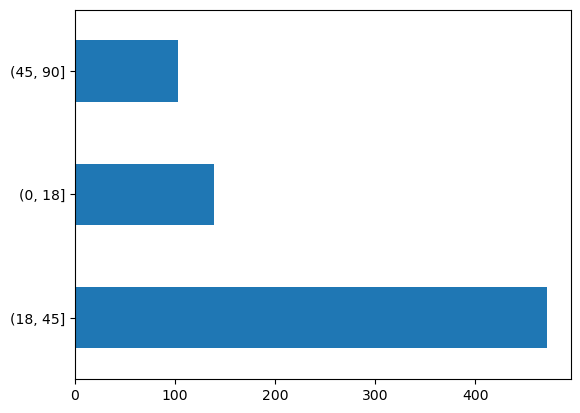

In [51]:
pd.cut(titanic["age"], bins = [0,18,45,90]).value_counts().plot(kind = "barh")

In [ ]:
# istediğim aralıkta böldü ama dağılımlar eşit değil

In [50]:
pd.qcut(titanic.age, q = 3)           # verilerin ayrımını eşit sayıda yapar

0      (0.419, 23.0]
1       (34.0, 80.0]
2       (23.0, 34.0]
3       (34.0, 80.0]
4       (34.0, 80.0]
           ...      
886     (23.0, 34.0]
887    (0.419, 23.0]
888              NaN
889     (23.0, 34.0]
890     (23.0, 34.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.419, 23.0] < (23.0, 34.0] < (34.0, 80.0]]

<AxesSubplot:>

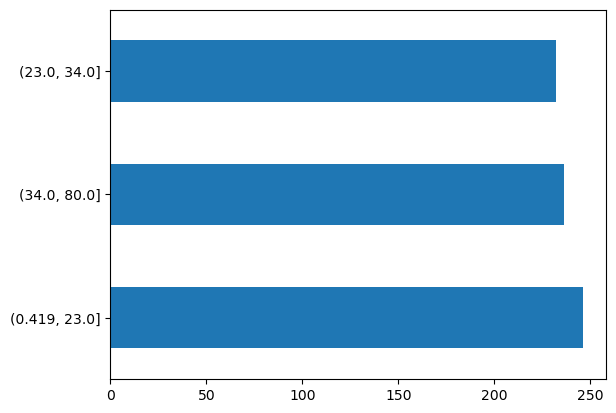

In [52]:
pd.qcut(titanic.age, q = 3).value_counts().plot(kind = "barh")

In [53]:
# qcut bölünmeleri eşit sayıda olucak şekilde ayırdı

In [54]:
pd.qcut(titanic.age, q = 4, labels = ["newer","medium","not so old","oldest"])        # isimlendirme

0          medium
1      not so old
2          medium
3      not so old
4      not so old
          ...    
886        medium
887         newer
888           NaN
889        medium
890    not so old
Name: age, Length: 891, dtype: category
Categories (4, object): ['newer' < 'medium' < 'not so old' < 'oldest']

**özetle:**
    
**cut** bins değeri ile min-max aralığını eşit parçaya böler ama her bölme eşit sayıda gözleme sahip olmayabilir

**qcut** ise q değeri ile veri dağılımı eşit olucak şekilde böler ancak burda bölünme sınırları orantısız olucaktır